<h2 align=center>Data Analysis and Visualization using Plotly and Seaborn in Python</h2>

This project is built on top of the "***Data Analysis Using Seaborn and Python***" project I created. You can fnd this project in [kaggle](https://www.kaggle.com/code/arielfelices/data-analysis-using-seaborn-and-python) and [github](https://github.com/A-C-A-F/Data-Analysis-Using-Seaborn-and-Python).

## Task 1: Assessing Previous Work

### Import Libraries

Install all the packages.

In [1]:
import numpy as np
import pandas as pd
#pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
import lightgbm as lgb
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import xgboost as xgb
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import json
import ast
from urllib.request import urlopen
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Loading and Exploration

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,...,12,4,2,13,8,4,2,4,4,0
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,...,0,0,1,0,1,1,1,0,0,0
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,10/10/14,...,5,9,1,5,4,3,6,3,1,0
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,3/9/12,...,0,0,1,0,0,1,0,0,0,0
4,5,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,2/5/09,...,0,0,1,0,0,1,0,0,0,0


As a standard practice in Machine Learning and Data Science scenarios, when you want to predict a target variable, it's best practice in your EDA (exploratory data analysis) phase to look at the distribution of the target variables.

### Visualizing the Target Distribution

Creates a figure with two subplots side by side. The first subplot displays the histogram of the 'revenue' data, while the second subplot displays the histogram of the natural logarithm of the 'revenue' data. This allows for a comparison between the original revenue distribution and its logarithmic transformation.

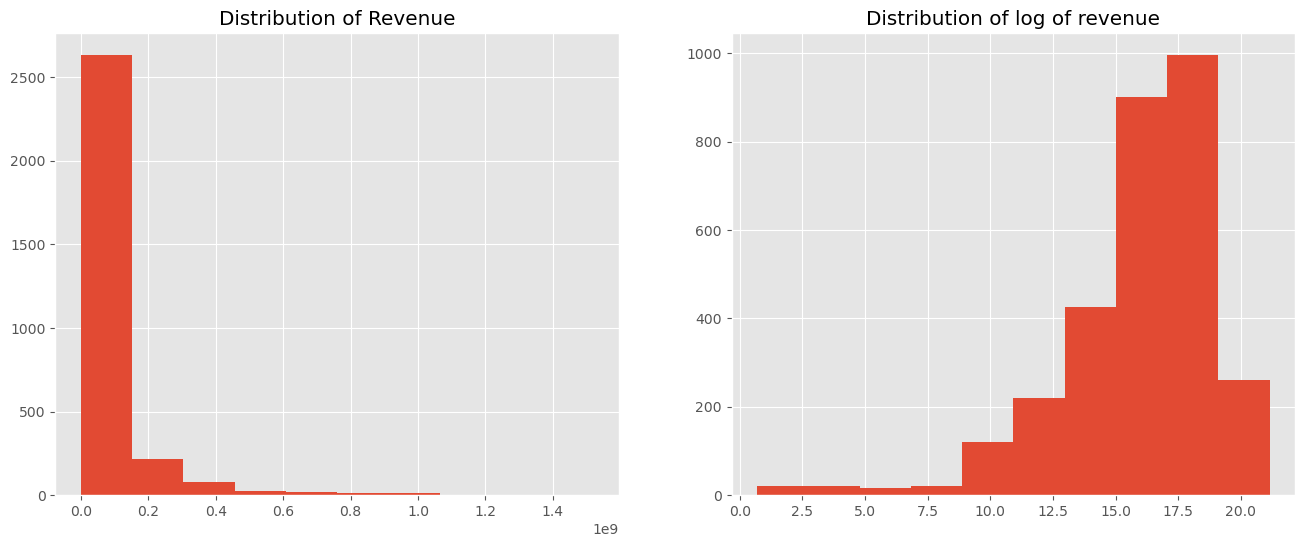

In [4]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['revenue']);
plt.title('Distribution of Revenue');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['revenue']));
plt.title('Distribution of log of revenue');

The distribution is extremely skewed. To satisfy assumptions of a linear regression, and to make sure that the model that we build around it performs more accurately, we will log transform our target column so that it will have less skewness and kurtosis.

In [5]:
train['log_revenue'] = np.log1p(train['revenue'])

### Relationship between Film Revenue and Budget

Create a figure with two subplots to visualize the distribution of the 'budget' variable in the 'train' DataFrame.

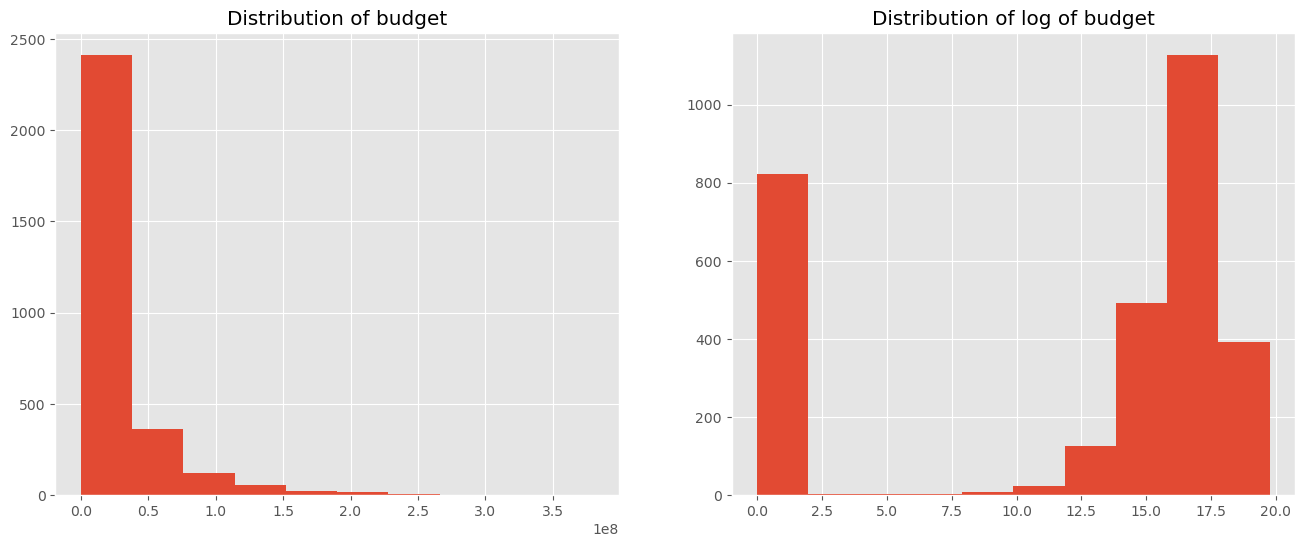

In [6]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['budget']);
plt.title('Distribution of budget');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['budget']));
plt.title('Distribution of log of budget');

By using subplots, the code creates two histograms side by side in a single figure. The first histogram shows the distribution of the 'budget' values, while the second histogram shows the distribution of the logarithm of the 'budget' values. This allows for a comparison between the original distribution and the transformed distribution using the logarithm.

Create a figure with two subplots to visualize the relationship between the 'budget' variable and the 'revenue' variable in the 'train' DataFrame.

Text(0.5, 1.0, 'Log Revenue vs log budget')

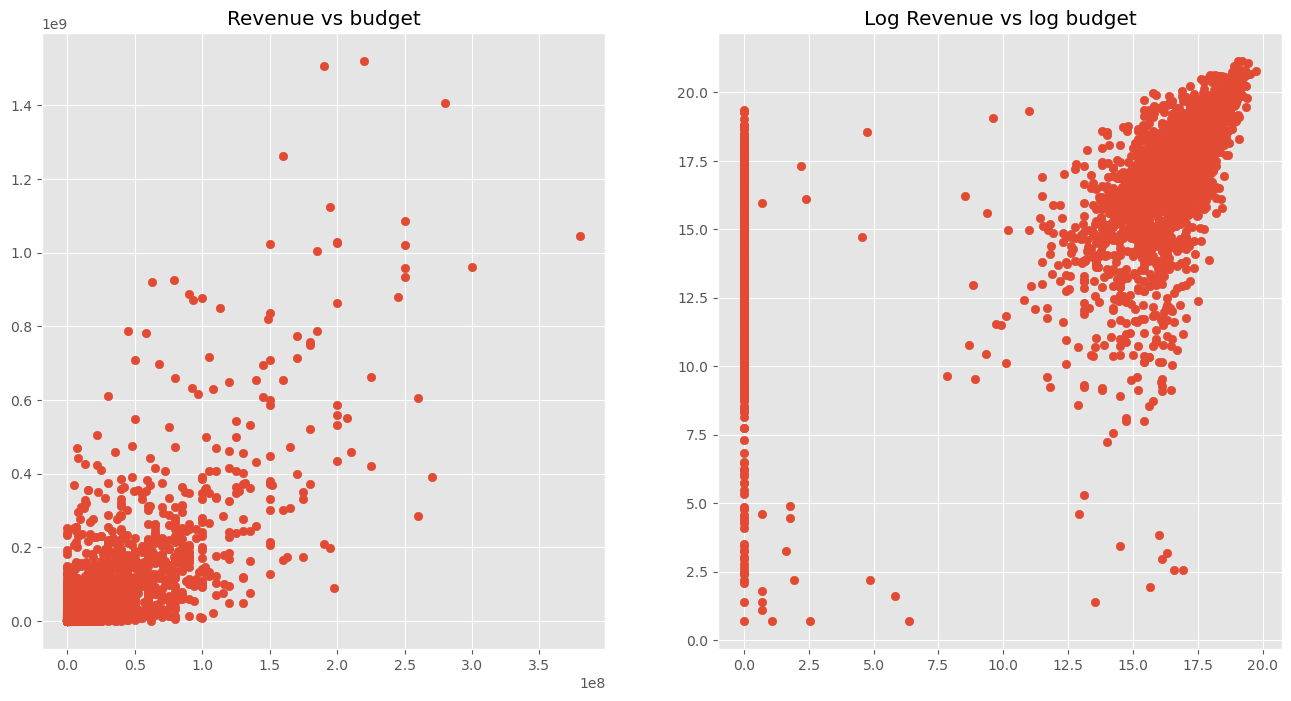

In [7]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['budget'], train['revenue'])
plt.title('Revenue vs budget');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(train['budget']), train['log_revenue'])
plt.title('Log Revenue vs log budget')

By using subplots, the code creates two scatter plots side by side in a single figure. The first scatter plot shows the relationship between the original 'budget' and 'revenue' values, while the second scatter plot shows the relationship between the logarithmically transformed 'budget' and 'log_revenue' values.

Create new columns in the 'train' and 'test' DataFrames called 'log_budget' by applying the natural logarithm transformation to the existing 'budget' columns.

In [8]:
train['log_budget'] = np.log1p(train['budget'])
test['log_budget'] = np.log1p(test['budget'])

By creating the 'log_budget' columns, the code transforms the original 'budget' values to their natural logarithm equivalents in both the 'train' and 'test' DataFrames. This transformation is commonly used to handle skewed distributions and can help in modeling or visualizing the data in a more meaningful way, especially if the 'budget' values are positively skewed or have a wide range.

### Does having an Official Homepage Affect Revenue?

Obtain a table-like output showing the top 10 most common values in the 'homepage' column, along with their respective counts.

In [9]:
train['homepage'].value_counts().head(10)

http://www.transformersmovie.com/                      4
http://www.thehobbit.com/                              2
http://www.lordoftherings.net/                         2
http://sonyclassics.com/whiplash/                      1
https://www.facebook.com/thefinesthoursmovie           1
http://sonyclassics.com/pariscanwait/                  1
http://www.maxpaynethemovie.com                        1
http://www.sonypictures.com/movies/afewgoodmen/        1
http://www.theasylum.cc/product.php?id=203             1
http://www.miramax.com/movie/the-cider-house-rules/    1
Name: homepage, dtype: int64

Add a new column 'has_homepage' to both the 'train' and 'test' DataFrames and populates it with 1 or 0 depending on whether the corresponding 'homepage' value is null or not.

In [10]:
train['has_homepage'] = 0
train.loc[train['homepage'].isnull() == False, 'has_homepage'] = 1
test['has_homepage'] = 0
test.loc[test['homepage'].isnull() == False, 'has_homepage'] = 1

Generate a categorical plot that visualizes the relationship between the presence or absence of a homepage ('has_homepage') and the corresponding revenue ('revenue') for films in the 'train' DataFrame. The plot will provide insights into any potential differences in revenue between films with and without a homepage.

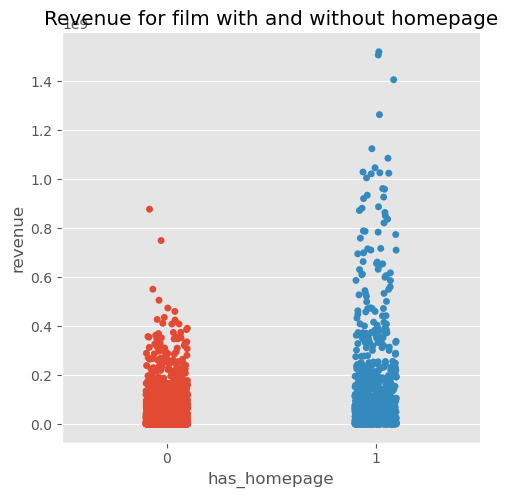

In [11]:
sns.catplot(x='has_homepage', y='revenue', data=train);
plt.title('Revenue for film with and without homepage');

### Distribution of Languages in Film

Generates a figure with two subplots, each displaying a box plot. The first subplot shows the mean revenue per language for films with the top 10 most frequent languages, while the second subplot shows the mean logarithmic revenue per language for the same set of films.

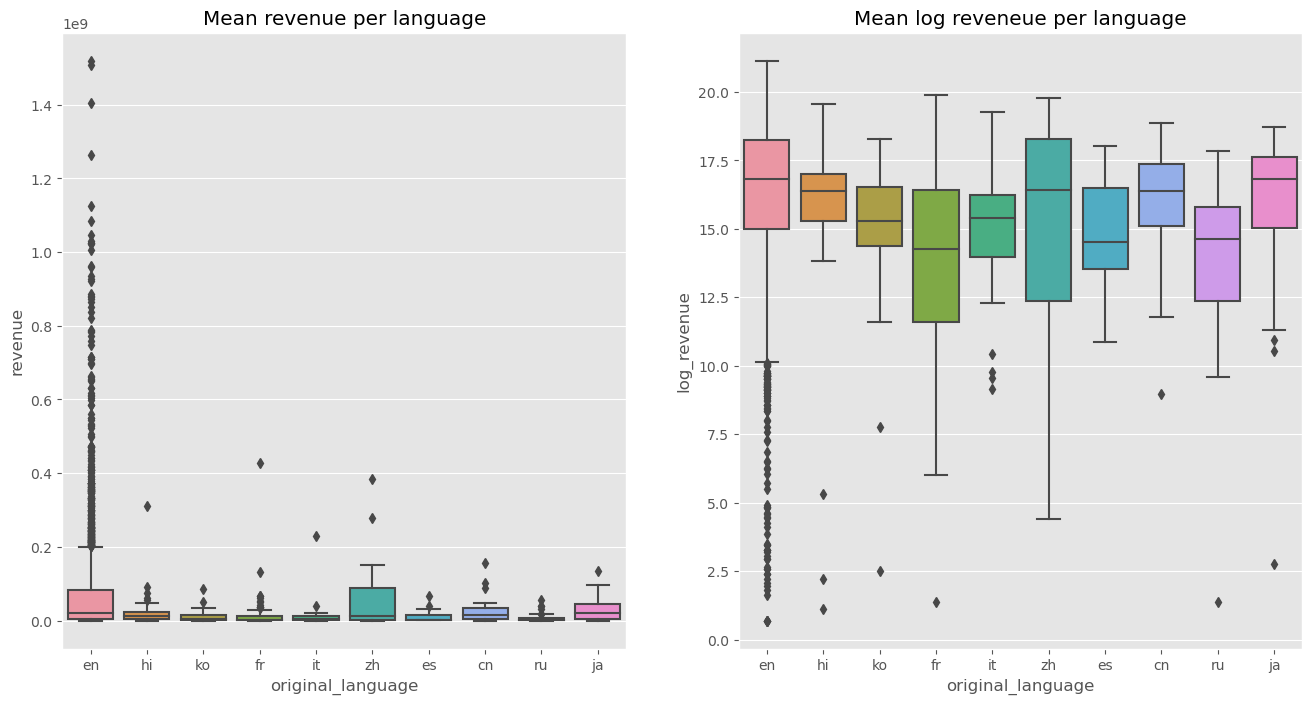

In [12]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='original_language', y='revenue', data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]);
plt.title('Mean revenue per language');
plt.subplot(1, 2, 2)
sns.boxplot(x='original_language', y='log_revenue', data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]);
plt.title('Mean log reveneue per language');

This visualization allows for a comparison of the revenue distribution across different languages and provides insights into potential differences in revenue based on the original language of the films.

### Frequent Words in Film Titles and Discriptions

Create a word cloud visualization of the most frequent words found in the 'original_title' column of the 'train' DataFrame. The word cloud image represents the relative frequency of each word, with larger words indicating higher frequency.

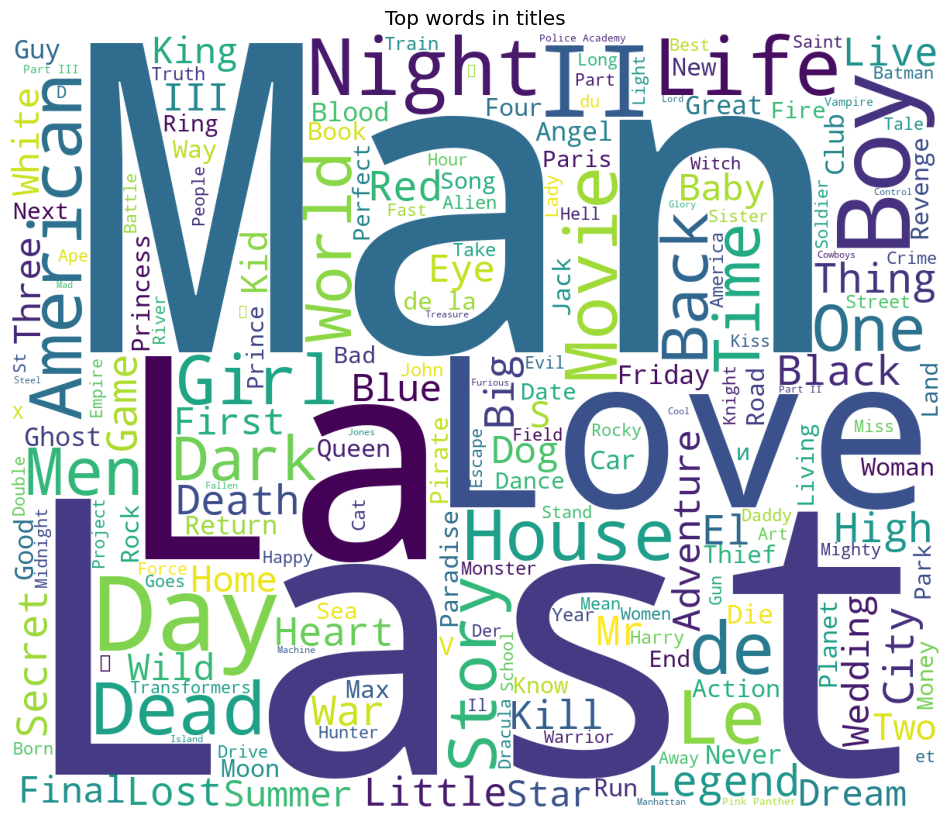

In [13]:
plt.figure(figsize = (12, 12))
text = ' '.join(train['original_title'].values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in titles')
plt.axis("off")
plt.show()

Create a word cloud visualization of the top words found in the 'overview' column of the 'train' DataFrame. 

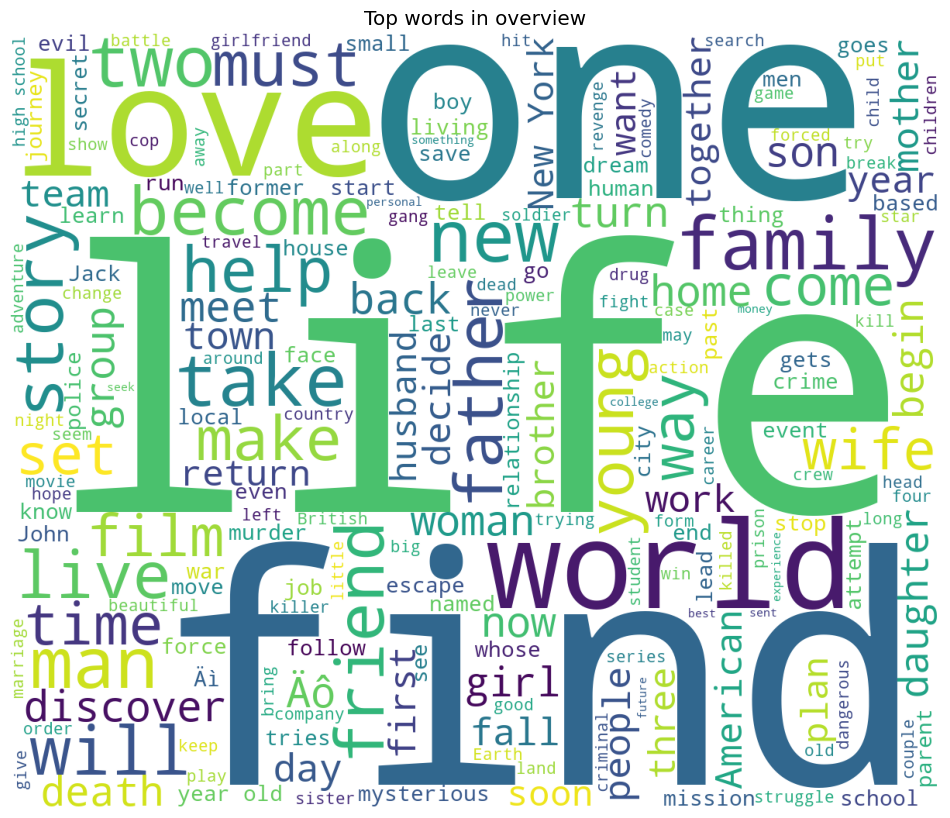

In [14]:
plt.figure(figsize=(12,12))
text = ' '.join(train['overview'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in overview')
plt.axis("off")
plt.show()

These visualizations provides a visual summary of the most common words used in the film titles and movie overviews.

### Do Film Descriptions Impact Revenue?

Transform text data using the TfidfVectorizer, train a linear regression model on the transformed features, and use eli5 to display the weights of the model.

In [15]:
import eli5

vectorizer = TfidfVectorizer(
            sublinear_tf=True,
            analyzer='word',
            token_pattern=r'\w{1,}',
            ngram_range=(1, 2),
            min_df=5)

overview_text = vectorizer.fit_transform(train['overview'].fillna(''))
linreg = LinearRegression()
linreg.fit(overview_text, train['log_revenue'])
eli5.show_weights(linreg, vec=vectorizer, top=20, feature_filter=lambda x: x != '<BIAS>')

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



The code above demonstrates the process that allows for the interpretation and understanding of which words or n-grams are influential in predicting the logarithm of the revenue for movies based on their overviews.

Print the actual target value (logarithm of the revenue) for a specific observation and use eli5 to show the prediction explanation, indicating the important textual features that contributed to the predicted value.

In [16]:
print('Target value', train['log_revenue'][1000])
eli5.show_prediction(linreg, doc=train['overview'].values[1000], vec=vectorizer)

Target value 16.44583954907521


The given code involves the eli5 library and demonstrates the prediction explanation for a specific observation using a trained linear regression model. This helps in understanding the factors that influenced the model's prediction for that particular observation.

## Task 2: Analyzing Movie Release Dates

Let's check the __release_date__ column.

In [17]:
train.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_revenue,log_budget,has_homepage
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,...,13,8,4,2,4,4,0,16.326300,16.454568,0
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,...,0,1,1,1,0,0,0,18.370959,17.504390,0
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,10/10/14,...,5,4,3,6,3,1,0,16.387512,15.009433,1
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,3/9/12,...,0,0,1,0,0,0,0,16.588099,13.997833,1
4,5,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,2/5/09,...,0,0,1,0,0,0,0,15.182615,0.000000,0


The dates are not in a most convenient format to fit into ML models and also to conduct some analyses. We need to convert it to a standardized format using pandas datetime function. Our dataset is supposed to contains movies from 1900s to 21st century. We have to ensure that the exact year is specified.

Retrieve the values from the 'release_date' column in the 'test' DataFrame where the values are not null (not missing).

In [18]:
test.loc[test['release_date'].isnull() == False, 'release_date'].head()

0    7/14/07
1    5/19/58
2    5/23/97
3     9/4/10
4    2/11/05
Name: release_date, dtype: object

The dates are presented in day/month/year format. We need to correct the string value for the year.

## Task 3: Preprocessing Features

Create a function called fix_date that takes a string x as input. The purpose of the function is to fix the formatting of a date string by updating the year portion to a four-digit year format.

In [19]:
def fix_date(x):
    year = x.split('/')[2]
    if int(year) <= 19:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year

Here's a breakdown of the code:

1. __year = x.split('/')[2]__:
- This line splits the input string x using the '/' character as a delimiter.
- The resulting split string is assigned to a list, and the third element of the list (index 2) corresponds to the year portion of the date.

2. __if int(year) <= 19:__:
- This line checks if the year value, converted to an integer using the int() function, is less than or equal to 19.
- The condition is used to distinguish between two-digit years in the range 00-19 and four-digit years in the range 2000-2019.

3. __return x[:-2] + '20' + year__:
- If the condition in the previous line is true (year <= 19), this line is executed.
- The line concatenates the original date string x without the last two characters (day and year) with the string '20' and the two-digit year value.
- This effectively replaces the two-digit year with a four-digit year in the 2000s range.

4. __else:__:
- If the condition in line 2 is false (year > 19), this line is executed.

5. __return x[:-2] + '19' + year__:
- The line concatenates the original date string x without the last two characters (day and year) with the string '19' and the two-digit year value.
- This replaces the two-digit year with a four-digit year in the 1900s range.

The fix_date function can be used to correct the formatting of dates that have two-digit years and convert them into a more standardized four-digit year format.

In [20]:
# Let's check if there are any null values for the release date.
# If so, we need to do data imputation techniques.
test.loc[test['release_date'].isnull() == True].head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_budget,has_homepage
828,3829,0,NaN,tt0210130,en,"Jails, Hospitals & Hip-Hop","Jails, Hospitals &amp; Hip-Hop is a cinematic ...",0.009057,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0


The code retrieves the rows from the 'test' DataFrame where the 'release_date' column has null values. The .head() method is then used to display the first few rows that meet this condition.

The release date for the movie "Jails, Hospitals & Hip-Hop" is NaN. We cansimply look up in google the relase date for this movie.

In [21]:
# The initial release date according to google is May 2000.
test.loc[test['release_date'].isnull() == True, 'release_date'] = '05/01/00'

Now, the null value in the 'release_date' column of the 'test' DataFrame for this movie is replaced with the date string '05/01/00'. 

Note:
This approach can be useful when dealing with missing data by providing a default value or placeholder for the missing values.

In [22]:
# Let's apply our fix_date function to both train and test set
train['release_date'] = train['release_date'].apply(lambda x: fix_date(x))
test['release_date'] = test['release_date'].apply(lambda x: fix_date(x))

By using this code, the 'release_date' columns in both the 'train' and 'test' DataFrames are transformed by applying the fix_date function to each value. This ensures that the year portion of the date strings is correctly formatted with a four-digit year.

## Task 4: Creating Features Based on Release Date

Convert the release_date column to pandas standard datetime format.

In [23]:
train['release_date'] = pd.to_datetime(train['release_date'])
test['release_date'] = pd.to_datetime(test['release_date'])

By using this code, the 'release_date' columns in both the 'train' and 'test' DataFrames are transformed from strings to pandas datetime objects. This conversion allows for easier manipulation and analysis of dates, such as extracting specific components (year, month, day) or performing date-based calculations.

Create a function called process_date that processes the 'release_date' column in a DataFrame by extracting different components of the date and creating new columns for each component. Create additonal columns such as day, month, year quarter, etc..

In [24]:
def process_date(df):
    date_parts = ['year', 'weekday', 'month', 'weekofyear', 'day', 'quarter']
    for part in date_parts:
        part_col = 'release_date' + '_' + part
        df[part_col] = getattr(df['release_date'].dt, part).astype(int)
    return df

train = process_date(train)
test = process_date(test)

C:\Users\user\AppData\Local\Temp\ipykernel_22508\4242508006.py:5: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

C:\Users\user\AppData\Local\Temp\ipykernel_22508\4242508006.py:5: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



By using this code, the 'release_date' column is processed to extract different date components such as year, weekday, month, week of the year, day, and quarter. New columns are added to the DataFrame for each extracted component, resulting in an enriched dataset with additional date-related information.

## Task 5: Using Plotly to Visualize the Number of Films Per Year

Calculates the frequency counts of unique values in the 'release_date_year' column of both the 'train' and 'test' DataFrames and sorts them in ascending order based on the index.

In [25]:
d1 = train['release_date_year'].value_counts().sort_index()
d2 = test['release_date_year'].value_counts().sort_index()

In [26]:
# let's import plotly to create our interactive visualizations

import plotly.offline as py
## the offline module provides functionalities to work with Plotly 
## in offline environments (e.g., Jupyter Notebook without an 
## internet connection).

py.init_notebook_mode(connected=True)
## The init_notebook_mode() function is called from the plotly.offline 
## module, and it enables the necessary JavaScript libraries and 
## configurations to display Plotly plots within a Jupyter Notebook.

## The connected=True argument indicates that the Plotly plots 
## should be connected to the notebook environment.

import plotly.graph_objs as go
## The graph_objs module provides classes and functions to create 
## interactive plots using Plotly.

Generate an interactive plot that shows the number of films per year. The plot should include two scatter plots, one for the 'train' dataset and another for the 'test' dataset, with years on the x-axis and the corresponding film counts on the y-axis. The plot is titled 'Number of films per year' and includes a legend that indicates the datasets represented by each scatter plot.

In [27]:
data = [go.Scatter(x=d1.index, y=d1.values, name='train'),
        go.Scatter(x=d2.index, y=d2.values, name='test')]

layout = go.Layout(dict(title = 'Number of films per year',
                        xaxis = dict(title = 'Year'),
                        yaxis = dict(title = 'Count'),
                        ), legend = dict(orientation='v'))
py.iplot(dict(data=data, layout=layout))